# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.130573e+01     8.900441e+00
 * time: 0.0030159950256347656
     1     2.804016e+01     4.238937e+00
 * time: 0.013573884963989258
     2     1.923604e+01     3.489695e+00
 * time: 0.02634406089782715
     3     1.254425e+01     2.266430e+00
 * time: 0.03939199447631836
     4     1.150608e+01     2.744896e+00
 * time: 0.1118319034576416
     5     1.094033e+01     1.897665e+00
 * time: 0.1222679615020752
     6     1.001818e+01     1.518636e+00
 * time: 0.13257908821105957
     7     9.102189e+00     1.206997e+00
 * time: 0.1428539752960205
     8     8.492333e+00     8.162156e-01
 * time: 0.15285706520080566
     9     8.211638e+00     4.767057e-01
 * time: 0.16309404373168945
    10     8.108076e+00     4.600955e-01
 * time: 0.1733379364013672
    11     8.092933e+00     9.794921e-01
 * time: 0.18112397193908691
    12     8.058028e+00     5.866067e-01
 * time: 0.18886995315551758
    13     7.997444e+00     4.866042e-01
 * time: 

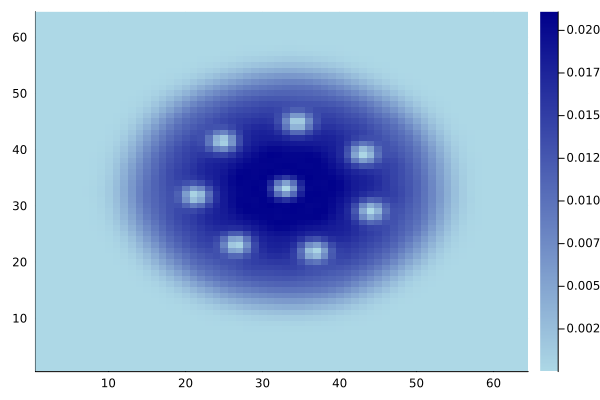

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)